In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('world_population.db')
conn.close()

In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('world_population.db')

# Execute a SELECT query
query = 'SELECT CountryName, Population FROM population WHERE Year=2020  LIMIT 10;'
results = pd.read_sql_query(query,conn)

# Print the results
print(results)

# Close the database connection
conn.close()

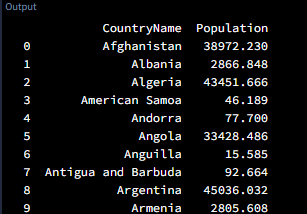

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('world_population.db')

# Write code below
query = """
		SELECT CountryName, Year, Population 
        FROM population
        WHERE CountryName = "UK";
        """
results = pd.read_sql_query(query,conn)
print(results.head(10))

# Close the database connection
conn.close()

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('world_population.db')

query = """
		SELECT Year, Population 
        FROM population
        WHERE CountryName = 'Viet Nam'
        """
data = pd.read_sql_query(query, conn)
# Create a column chart of the population data for the country by year
plt.bar(data['Year'], data['Population'])
plt.xlabel('year')
plt.ylabel('Population')
plt.title('Population of Viet Nam by Year')
plt.show()
conn.close()

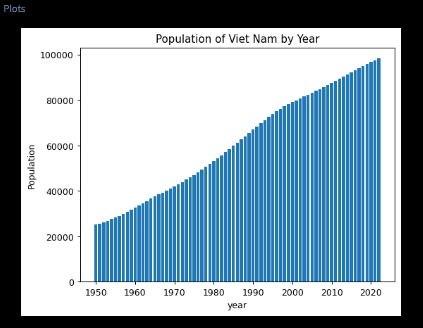

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('world_population.db')

# Write a query to select the change in population by region and subregion from 2010-2020
query = """
SELECT region, subregion, sum(PopChange) as TotalPopChange
  FROM population p
  JOIN country_mapping c ON p.CountryCode = c.CountryCode
 WHERE Year between 2010 and 2020
 GROUP BY region, subregion
 ORDER BY TotalPopChange DESC
 LIMIT 10;
"""

# Read the query results into a pandas dataframe
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Create a horizontal bar chart to visualize the results
plt.barh(df['SubRegion'], df['TotalPopChange'])
plt.xlabel('Population Change')
plt.ylabel('Subregion')
plt.title('Top 10 Subregions by Population Change from 2010 to 2020')

# Show the plot
plt.show()

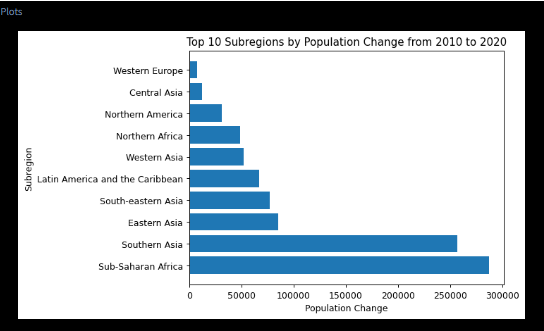